# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd #import pandas

# Read "twitter-archive-enhanced.csv" in to a dataframe
we_rate_dogs = pd.read_csv("twitter-archive-enhanced.csv")

In [2]:
we_rate_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import os
import requests

In [4]:
# The url that holds the image predictions
url =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# A request is made to the url using the request package
response = requests.get(url)

# The respnse of the request is store in a file
with open("image_prediction.tsv", mode ="wb") as file:
    file.write(response.content)

# Th response is the read into a dataframe
image_prediction = pd.read_csv("image_prediction.tsv", sep = "\t")

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import json
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#Twitter API configuration
if os.path.isfile('tweet-json.txt'):
    print("This dataset has already been downloaded and is available in tweet-json.txt file.")
else:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions 
    consumer_key = ''
    consumer_secret = ''
    access_token = ''
    access_secret = ''
    
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    api = tweepy.API(auth, wait_on_rate_limit=True)
    
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
    
    tweet_ids = tweets_archive.tweet_id.values
    len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet-json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

This dataset has already been downloaded and is available in tweet-json.txt file.


In [7]:
# view the content of the tweet-json file
tweets_from_json = []
for line in open('tweet-json.txt', 'r'):
    tweets_from_json.append(json.loads(line))
tweets_from_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [8]:
#create a datalist from tweet-json.txt
#initialize a dictionary
tweets_dict = []

# A for loop to read into the created dictionary the twitter data jason file 
for info in tweets_from_json:
    tweets_dict.append({"tweet_id" : info["id"],
                        "retweet_count": int(info["retweet_count"]),
                       "favorite_count" : int(info["favorite_count"]),
                        "source" : str(info["source"]),
                       })
    
# convert the twitter data to a pandas dataframe 
twitter_data = pd.DataFrame(tweets_dict, columns = ["tweet_id", "retweet_count" , "favorite_count", "source"])

In [9]:
#view the dataframe
twitter_data.head()

,tweet_id,retweet_count,favorite_count,source
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### We_rate_dogs Table

In [10]:
# To print the first five records of the table to manualy assess
we_rate_dogs.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# To see some information of the table
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# To check for duplicates
we_rate_dogs["tweet_id"].duplicated().sum()

0

In [13]:
# To see the various rating numerator scores
we_rate_dogs["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
# To see the variations of maximum scores (rating denominator)
we_rate_dogs["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# To see the different dog names
we_rate_dogs["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [16]:
# It was seen that invalid names are lowercased
# To see the various invalid names
temp_we_rate_dogs = we_rate_dogs[we_rate_dogs["name"].str.islower() == True]

temp_we_rate_dogs["name"].value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
mad              2
not              2
actually         2
light            1
officially       1
space            1
such             1
all              1
life             1
my               1
by               1
this             1
unacceptable     1
old              1
his              1
infuriating      1
incredibly       1
Name: name, dtype: int64

### Image_Prediction Table

In [17]:
# To print the first five records of the table to manualy assess
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# To see some information of the table
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# To check for duplicates
image_prediction["tweet_id"].duplicated().sum()

0

In [20]:
# To check for duplicates
image_prediction["jpg_url"].duplicated().sum()

66

### Twitter_data Table

In [21]:
# To print the first five records of the table to manualy assess
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,source
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r..."


In [22]:
# To see some information of the table
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
source            2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [23]:
# To check for duplicates
twitter_data["tweet_id"].duplicated().sum()

0

In [24]:
# To see the numerical distribution of the last two columns of the table
twitter_data[["retweet_count", "favorite_count"]].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues
1. The "time_stamp" column in the we_rate_dogs table should be of a Date data type.

2. There are invalid ratings in the rating_numerator and rating_denominator. For example 960/00 is not a valid rating.

3. The "jpg_url" column in the image_prediction table has duplicates.

4. The "name" column in the we_rate_dogs table has some invalid names.

5. The HTML tags in the "source" column in the we_rate_dogs table and twitter_data table obstructs easy reading, and should therefore be removed.

6. Columns like the retweets information column, img_num column in image predictions table are not needed and needs to be dropped.

7. Remove enteries in the image predictions table that have p1_dog, p2_dog, & p3_dog values set to false because these are not dogs of any kind.

8. Correct rating_numerators with decimals

### Tidiness issues
1. The columns ["doggo", "floofer", "pupper", "puppo"] in the we_rate_dogs table need to be combined to one column named dog category.

2. The we_rate_dogs, image_prediction, and twitter_data tables need to be combined.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
we_rate_dogs_cleaned = we_rate_dogs.copy()

image_prediction_cleaned = image_prediction.copy()

twitter_data_cleaned = twitter_data.copy()

### Issue #1:

#### Define:

The "time_stamp" column in the we_rate_dogs table should be of a Date data type.

#### Code

In [26]:
# Convert the timestamp column to a date datatype
we_rate_dogs_cleaned["timestamp"] = pd.to_datetime(we_rate_dogs_cleaned["timestamp"])

#### Test

In [27]:
we_rate_dogs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:

#### Define:

There are invalid ratings in the rating_numerator and rating_denominator. For example 960/00 is not a valid rating.

Maximum numerator rating should be 15. Every other value is considered an outlier or invalid and would therefore be removed. The same should be done for the rating denominator. The rating denominator should be 10. Every other value is considered an outlier or invalid value and would be removed.

#### Code

In [28]:
# Drop rows with invalid denominator values
we_rate_dogs_cleaned = we_rate_dogs_cleaned[we_rate_dogs_cleaned["rating_denominator"] == 10]

In [30]:
# Drop rows with invalid numerator values
we_rate_dogs_cleaned.loc[we_rate_dogs_cleaned['rating_numerator']>15, 'rating_numerator'] = 15

#### Test

In [31]:
we_rate_dogs_cleaned["rating_denominator"].value_counts()

10    2333
Name: rating_denominator, dtype: int64

In [32]:
we_rate_dogs_cleaned["rating_numerator"].value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
15     12
2       9
1       8
0       2
Name: rating_numerator, dtype: int64

In [33]:
#check the rating_denominator and rating_numerator
we_rate_dogs_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,10.722675,10.0
std,2.189713,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,15.000000,10.0


### Issue #3:

#### Define
The "jpg_url" column in the image_prediction table has duplicates.

#### Code

In [34]:
# Drop duplicates in the jpg_url column
image_prediction_cleaned = image_prediction_cleaned.drop_duplicates(subset="jpg_url")

#### Test

In [35]:
image_prediction_cleaned["jpg_url"].duplicated().sum()

0

### Issue #4:

#### Define:

The "name" column in the we_rate_dogs table has some invalid names.

#### Code

In [36]:
# since it was noticed that the invalids start with lower case
# They would be dropped
we_rate_dogs_cleaned = we_rate_dogs_cleaned[we_rate_dogs_cleaned["name"].str[0].str.isupper()]


#### Test

In [37]:
we_rate_dogs_cleaned["name"].value_counts()

None         728
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
Bailey         7
Toby           7
Daisy          7
Buddy          7
Jack           6
Dave           6
Stanley        6
Koda           6
Bella          6
Scout          6
Milo           6
Rusty          6
Jax            6
Oscar          6
Leo            6
Finn           5
Chester        5
Louis          5
Oakley         5
            ... 
Diogi          1
Mairi          1
Laika          1
Carbon         1
Goose          1
Tedrick        1
Florence       1
Steve          1
Boston         1
Jackie         1
Bonaparte      1
Ralphie        1
Rumpole        1
Brandy         1
Herb           1
Blu            1
Staniel        1
Sojourner      1
Cheryl         1
Gòrdón         1
Noosh          1
Franq          1
Koko           1
Tito           1
Sky            1
Raphael        1
Cal            1
Shadoe        

### Issue #5:

#### Define:

The HTML tags in the "source" column in the we_rate_dogs table and twitter_data table obstructs easy reading, and should therefore be removed.

#### Code

In [38]:
# Striping the HTML tags in we_rate_dogs table
we_rate_dogs_cleaned["source"] = we_rate_dogs_cleaned["source"].str.extract('^<a.+>(.+)</a>$')

In [39]:
# Striping the HTML tags in twitter_data table
twitter_data_cleaned["source"] = twitter_data_cleaned["source"].str.extract('^<a.+>(.+)</a>$')

#### Test

In [40]:
we_rate_dogs_cleaned["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [41]:
twitter_data_cleaned["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #6:

#### Define:

Columns like the retweets information column, img_num column in image predictions table are not needed and needs to be dropped.

#### Code

In [44]:
# Remove rows that have values in retweets column in we_rate_dogs table
we_rate_dogs_cleaned = we_rate_dogs_cleaned[we_rate_dogs_cleaned['retweeted_status_id'].isnull()]
we_rate_dogs_cleaned = we_rate_dogs_cleaned[we_rate_dogs_cleaned['retweeted_status_user_id'].isnull()]
we_rate_dogs_cleaned = we_rate_dogs_cleaned[we_rate_dogs_cleaned['retweeted_status_timestamp'].isnull()]

In [45]:
# Dropping the columns with retweet infomation in we_rate_dogs
we_rate_dogs_cleaned = we_rate_dogs_cleaned.drop([
    "in_reply_to_status_id","in_reply_to_user_id",
    "expanded_urls", "retweeted_status_id", 
    "retweeted_status_user_id", "retweeted_status_timestamp"], 
    axis=1)

In [46]:
# Dropping img_num column in image predictions table
image_prediction_cleaned = image_prediction_cleaned.drop(['img_num'], axis=1)

#### Test

In [47]:
we_rate_dogs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2052 non-null int64
timestamp             2052 non-null datetime64[ns]
source                2052 non-null object
text                  2052 non-null object
rating_numerator      2052 non-null int64
rating_denominator    2052 non-null int64
name                  2052 non-null object
doggo                 2052 non-null object
floofer               2052 non-null object
pupper                2052 non-null object
puppo                 2052 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 192.4+ KB


In [48]:
image_prediction_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


### Issue #7:

#### Define:

Remove enteries in the image predictions table that have p1_dog, p2_dog, & p3_dog values set to false because these are not dogs of any kind.

#### Code

In [49]:
# Keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
image_prediction_cleaned = image_prediction_cleaned[((image_prediction_cleaned['p1_dog'] == True) & 
                  (image_prediction_cleaned['p2_dog'] == True) & 
                  (image_prediction_cleaned['p3_dog'] == True))]

#### Test

In [50]:
# Verify that false enteries have been removed
image_prediction_cleaned[((image_prediction_cleaned['p1_dog'] == False) & 
                  (image_prediction_cleaned['p2_dog'] == False) & 
                  (image_prediction_cleaned['p3_dog'] == False))]

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8:

#### Define:

Correct rating_numerators with decimals

#### Code

In [51]:
# check the columns that were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(we_rate_dogs_cleaned[we_rate_dogs_cleaned['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",15,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,15,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,15,10


In [52]:
#fix those rows
# first of all convert the datatype to float datatype
we_rate_dogs_cleaned[['rating_numerator', 'rating_denominator']] = we_rate_dogs_cleaned[['rating_numerator','rating_denominator']].astype(float)

#properly update the values
we_rate_dogs_cleaned.loc[(we_rate_dogs_cleaned.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
we_rate_dogs_cleaned.loc[(we_rate_dogs_cleaned.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
we_rate_dogs_cleaned.loc[(we_rate_dogs_cleaned.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
we_rate_dogs_cleaned.loc[(we_rate_dogs_cleaned.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
we_rate_dogs_cleaned.loc[(we_rate_dogs_cleaned.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test

In [53]:
# verify that columns properly captured decimals
with pd.option_context('max_colwidth', 200):
    display(we_rate_dogs_cleaned[we_rate_dogs_cleaned['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Issue #9:

#### Define:

The columns ["doggo", "floofer", "pupper", "puppo"] in the we_rate_dogs table need to be combined to one column named dog category.

#### Code

In [54]:
# combining the 4 categorical columns
we_rate_dogs_cleaned["dog_category"]= we_rate_dogs_cleaned["doggo"] + we_rate_dogs_cleaned["floofer"] + we_rate_dogs_cleaned["pupper"] + we_rate_dogs_cleaned["puppo"]

we_rate_dogs_cleaned["dog_category"] = we_rate_dogs_cleaned["dog_category"].map(lambda x: x.replace("None",""))

In [55]:
we_rate_dogs_cleaned["dog_category"] = we_rate_dogs_cleaned["dog_category"].apply(lambda x: x.strip()).replace('', "None")
we_rate_dogs_cleaned["dog_category"].value_counts()

None            1722
pupper           213
doggo             73
puppo             24
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_category, dtype: int64

In [56]:
# dropping the unneccessary columns and categorical values
we_rate_dogs_cleaned.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1, inplace = True)
we_rate_dogs_cleaned = we_rate_dogs_cleaned[we_rate_dogs_cleaned["dog_category"] != "doggopupper"]

In [57]:
# converting the new column to categorical type
we_rate_dogs_cleaned["dog_category"] = we_rate_dogs_cleaned["dog_category"].astype("category")

#### Test

In [58]:
we_rate_dogs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2043 non-null int64
timestamp             2043 non-null datetime64[ns]
source                2043 non-null object
text                  2043 non-null object
rating_numerator      2043 non-null float64
rating_denominator    2043 non-null float64
name                  2043 non-null object
dog_category          2043 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 130.0+ KB


In [59]:
we_rate_dogs_cleaned["dog_category"].value_counts()

None            1722
pupper           213
doggo             73
puppo             24
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_category, dtype: int64

### Issue #10:

#### Define:

The we_rate_dogs, image_predictor, and twitter_data tables need to be combined.

#### Code

In [61]:
# combining the three tables
we_rate_dogs_twitter_cleaned = pd.merge(we_rate_dogs_cleaned, 
                                        image_prediction_cleaned,
                                       on = "tweet_id")

we_rate_dogs_twitter_cleaned = pd.merge(we_rate_dogs_twitter_cleaned,
                                       twitter_data_cleaned, 
                                        on = ["tweet_id", "source"])

#### Test

In [62]:
we_rate_dogs_twitter_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 0 to 1130
Data columns (total 20 columns):
tweet_id              1131 non-null int64
timestamp             1131 non-null datetime64[ns]
source                1131 non-null object
text                  1131 non-null object
rating_numerator      1131 non-null float64
rating_denominator    1131 non-null float64
name                  1131 non-null object
dog_category          1131 non-null category
jpg_url               1131 non-null object
p1                    1131 non-null object
p1_conf               1131 non-null float64
p1_dog                1131 non-null bool
p2                    1131 non-null object
p2_conf               1131 non-null float64
p2_dog                1131 non-null bool
p3                    1131 non-null object
p3_conf               1131 non-null float64
p3_dog                1131 non-null bool
retweet_count         1131 non-null int64
favorite_count        1131 non-null int64
dtypes: bool(3), category(1

In [63]:
we_rate_dogs_twitter_cleaned.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_category,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
3,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848
4,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
#save cleaned dataframe as .csv file

we_rate_dogs_twitter_cleaned.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
# load cleaned data

tweets_archive_master = pd.read_csv('twitter_archive_master.csv')

In [66]:
# to see the general information of the data
tweets_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 20 columns):
tweet_id              1131 non-null int64
timestamp             1131 non-null object
source                1131 non-null object
text                  1131 non-null object
rating_numerator      1131 non-null float64
rating_denominator    1131 non-null float64
name                  1131 non-null object
dog_category          1131 non-null object
jpg_url               1131 non-null object
p1                    1131 non-null object
p1_conf               1131 non-null float64
p1_dog                1131 non-null bool
p2                    1131 non-null object
p2_conf               1131 non-null float64
p2_dog                1131 non-null bool
p3                    1131 non-null object
p3_conf               1131 non-null float64
p3_dog                1131 non-null bool
retweet_count         1131 non-null int64
favorite_count        1131 non-null int64
dtypes: bool(3), float64(5), int64(3)

In [67]:
# to see the most common dog name

tweets_archive_master["name"].value_counts()

None          284
Cooper          9
Charlie         8
Oliver          7
Sadie           6
Koda            6
Tucker          5
Lucy            5
Leo             5
Bo              5
Winston         5
Toby            5
Larry           4
Gus             4
Oscar           4
Dave            4
Scooter         4
Finn            4
Sophie          4
Stanley         4
Reggie          4
Bear            4
Daisy           4
Bella           3
Sebastian       3
Louis           3
Beau            3
Ellie           3
Olive           3
Penny           3
             ... 
Mimosa          1
Tayzie          1
Walker          1
Kuyu            1
Terrance        1
JD              1
Jerome          1
O               1
Belle           1
Clarkus         1
Furzey          1
Acro            1
Jackie          1
Bobbay          1
Kramer          1
Cecil           1
Shooter         1
Kawhi           1
Aqua            1
Timofy          1
Dobby           1
Vince           1
Oreo            1
Rodney          1
Tater     

In [68]:
# to see the most common dog category

tweets_archive_master["dog_category"].value_counts()

None            953
pupper          113
doggo            39
puppo            18
floofer           6
doggopuppo        1
doggofloofer      1
Name: dog_category, dtype: int64

In [72]:
# to see the most used twitter source

tweets_archive_master['source'].value_counts()

Twitter for iPhone    1114
Twitter Web Client      12
TweetDeck                5
Name: source, dtype: int64

### Insights:
1. Most dogs do not have names (represented as "None"), but they have ratings and other information. So "None" is the most popular dog name.

2. There are many dogs that do not belong to any dog category. These dogs are represented as "None".

3. The most used twitter source is "Twitter for Iphone"

4. There is a positive correlation of 0.92 between favorite counts and retweet counts. See visualization 2.

### Visualization

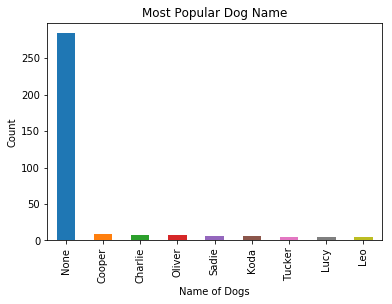

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot most popular dog name

pop_dog_name = tweets_archive_master['name'].value_counts()[0:9].plot(kind = 'bar');
pop_dog_name.set_title('Most Popular Dog Name');
pop_dog_name.set_ylabel('Count');
pop_dog_name.set_xlabel('Name of Dogs');

### Visualization 2

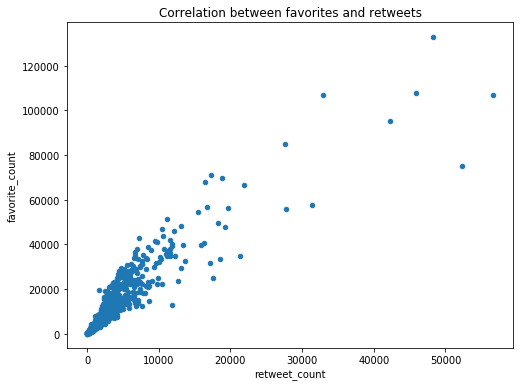

In [73]:
# to see the correlation between favorite counts and retweet counts
tweets_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(8,6), title = 'Correlation between favorites and retweets');

In [74]:
tweets_archive_master['favorite_count'].corr(tweets_archive_master['retweet_count'])

0.91628569531338866